In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [39]:
house_price_datasets=sklearn.datasets.fetch_california_housing()
house_price_datasets

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [40]:
house_price_df = pd.DataFrame(house_price_datasets.data, columns=house_price_datasets.feature_names)
house_price_df['price']=house_price_datasets.target
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
house_price_df.shape

(20640, 9)

In [42]:
house_price_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [43]:
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
correlation=house_price_df.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

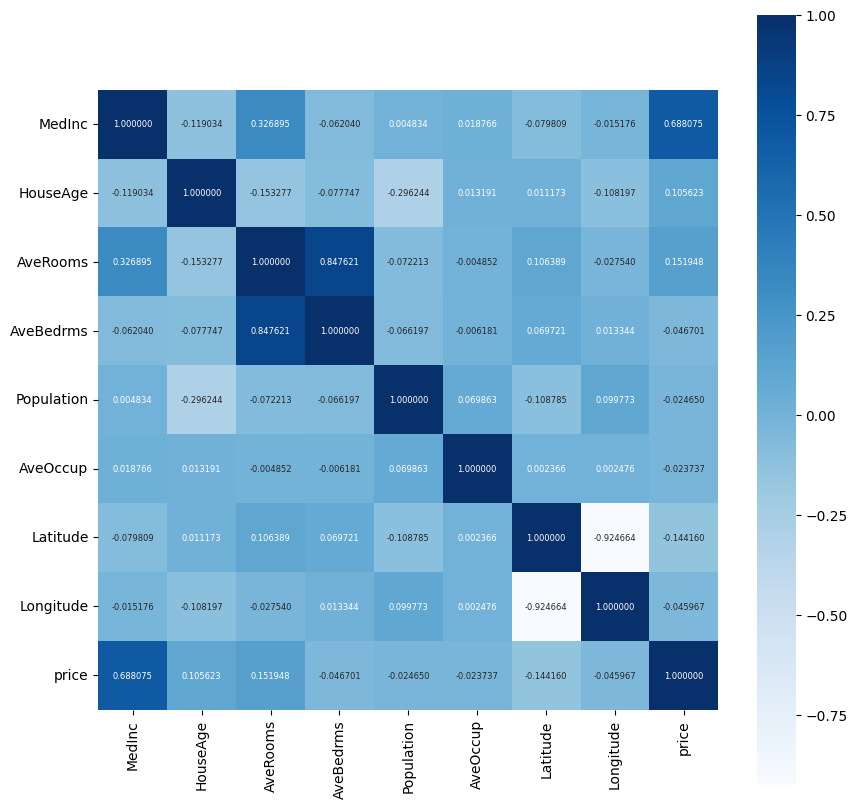

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt='1f',annot=True, annot_kws={'size': 6},cmap='Blues')

In [46]:
X=house_price_df.drop(['price'], axis=1)
y=house_price_df['price']

In [47]:
print(X)
print(y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [49]:
print(X.shape,X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [50]:
model=XGBRegressor()

In [51]:
model=model.fit(X_train , y_train)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
training_data_prediction = model.predict(X_train)
training_data_prediction

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [56]:
score_1 = metrics.r2_score(y_train , training_data_prediction)
score_2 = metrics.mean_absolute_error(y_train , training_data_prediction)
print("R squared error is :", score_1)
print("Mean Absoulte Error is :", score_2)

R squared error is : 0.943650140819218
Mean Absoulte Error is : 0.1933648700612105


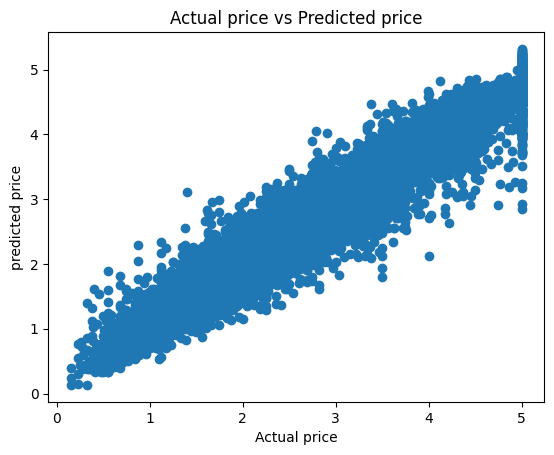

In [61]:
plt.scatter(y_train , training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [60]:
test_data_prediction=model.predict(X_test)
score_1=metrics.r2_score(y_test, test_data_prediction)
score_2=metrics.mean_absolute_error(y_test, test_data_prediction)
print("R squared error is :", score_1)
print("Mean Absoulte Error is :", score_2)

R squared error is : 0.8338000331788725
Mean Absoulte Error is : 0.3108631800268186
